In [1]:
library(tidyverse)
library(cowplot)
library(gridExtra)
library(grid)

# Custom package
library(rutils)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




In [2]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")
projects <- c("CESC", "UCS", "UCEC")

In [3]:
text_size <- 8
label_text_size <- 8
small_text_size <- 8
guide_size <- 4
family <- "ArialMT"
dpi <- 320
ht <- 8
wd <- 5.5

In [4]:
intra_figs <- list()
mat_sig_bplot_figs <- list()

inter_figs <- load(paste0(dirs$figures_dir, "/saved_obj/gene_interplots.RData"))

for (idx in 1:3) {
    intra_figs[[projects[idx]]] <- load(paste0(dirs$figures_dir, "/saved_obj/", unified_dsets[idx], "_intraplots.RData"))
    mat_sig_bplot_figs[[projects[idx]]] <- load(paste0(dirs$figures_dir, "/saved_obj/", unified_dsets[idx], "_mat_sig_bplots.RData"))
}
intra_figs <- Reduce(c, intra_figs)
mat_sig_bplot_figs <- Reduce(c, mat_sig_bplot_figs)

In [5]:
inter_figs
intra_figs
mat_sig_bplot_figs

[1] "demg_inter"     "figo_inter"     "survival_inter"

[1] "CESC_intra" "UCS_intra"  "UCEC_intra"

[1] "CESC_mat_sig_bplot" "UCS_mat_sig_bplot"  "UCEC_mat_sig_bplot"

In [6]:
hide_legend <- function(plt) {
    plt + theme(legend.position="none")
}

hide_axis_title <- function(plt, axis = "x") {
    if (axis == "x") {
        plt <- plt + theme(axis.title.x = element_blank())
    }
    else if (axis == "y") {
        plt <- plt + theme(axis.title.y = element_blank())
    }
    plt
}

hide_axis_text <- function(plt, axis = "x") {
    if (axis == "x") {
        plt <- plt + theme(axis.text.x = element_blank())
    }
    else if (axis == "y") {
        plt <- plt + theme(axis.text.y = element_blank())
    }
    plt
}

set_margins <- function(plt, margins = c(0, 0, 0, 0)) {
    plt + theme(plot.margin = unit(margins, "cm"))
}

In [7]:
inter_figs_list <- c(
    mget("demg_inter"),
    mget("figo_inter"),
    mget("survival_inter")
)
intra_figs_list <- c(
    mget("CESC_intra"),
    mget("UCEC_intra"),
    mget("UCS_intra")
)

In [8]:
n_cesc_intra <- 825
n_ucec_intra <- 748
n_ucs_intra <- 720

n_demg <- 839
n_figo <- 476
n_surv <- 76

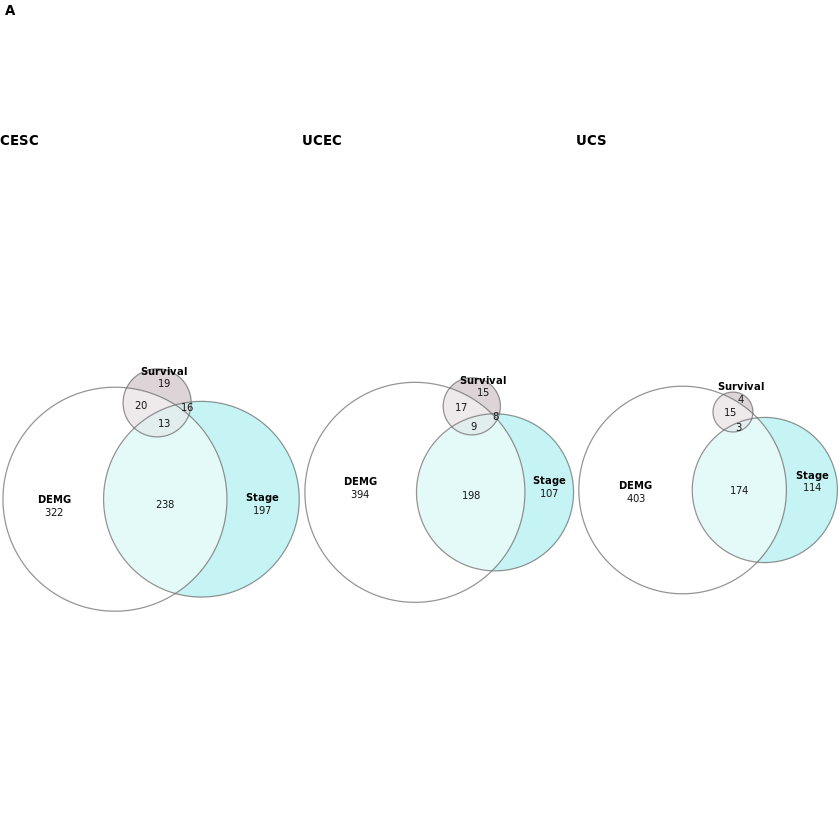

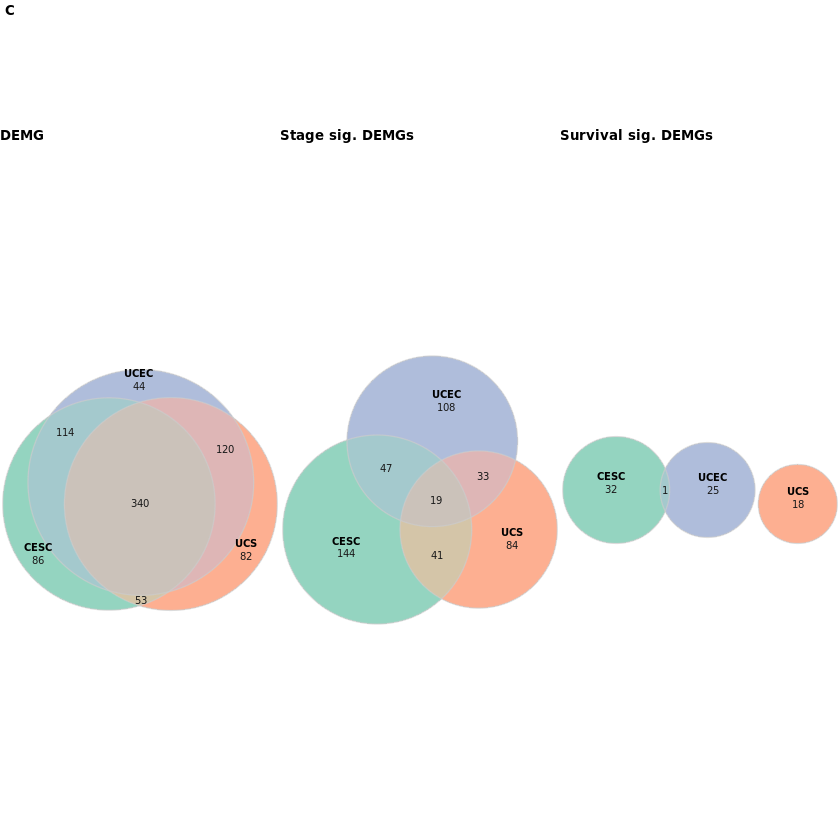

In [19]:
intra_grid <- plot_grid(
    plot_grid(NULL, labels = c("A"), label_size = label_text_size),
    plot_grid(
        CESC_intra + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")),
        UCEC_intra + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")),
        UCS_intra + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")),
        nrow = 1,
        # Proportional sizes
        rel_widths = c(n_cesc_intra, n_ucec_intra, n_ucs_intra),
        labels = c("CESC", "UCEC", "UCS"),
        vjust = 0.5,
        hjust = 0,
        label_size = text_size
    ),
    nrow = 2,
    rel_heights = c(0.2, 1),
    label_size = label_text_size,
    label_fontfamily = family
)

inter_grid <- plot_grid(
    plot_grid(NULL, labels = c("C"), label_size = label_text_size),
    plot_grid(
        demg_inter + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")),
        figo_inter + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")),
        survival_inter + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")),
        nrow = 1,
        # Proportional sizes
#         rel_widths = c(n_demg, n_figo, n_surv),
        labels = c("DEMG", "Stage sig. DEMGs", "Survival sig. DEMGs"),
        vjust = 0,
        hjust = 0,
        label_size = text_size,
        label_fontfamily = family
    ),
    nrow = 2,
    rel_heights = c(0.2, 1),
    label_size = label_text_size,
    label_fontfamily = family
)

intra_grid
inter_grid

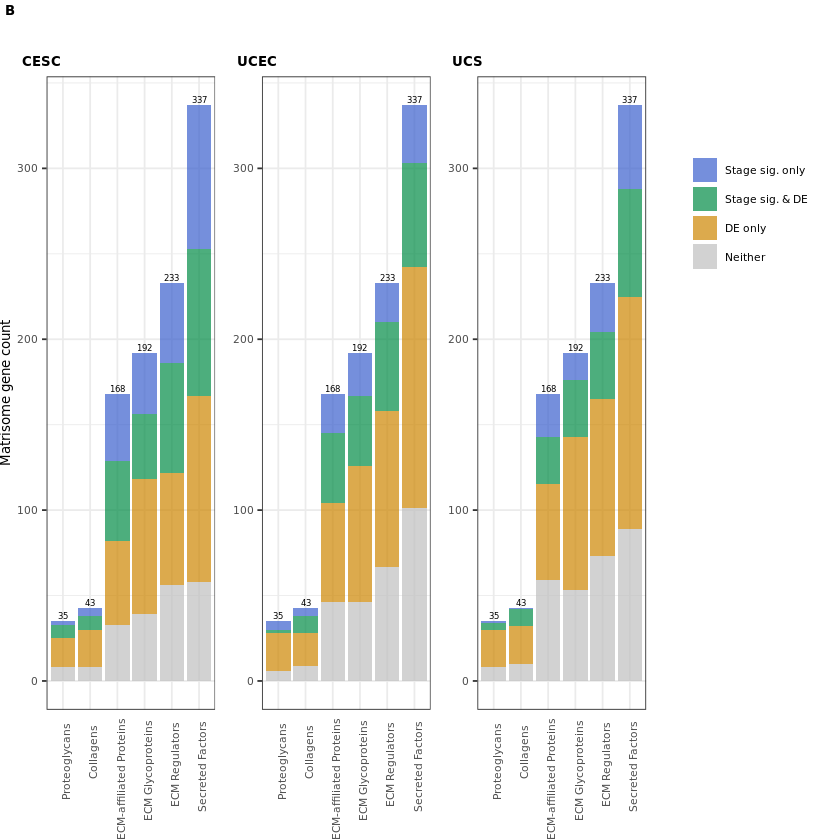

In [10]:
mat_sig_bplot_list <- c(
    mget("CESC_mat_sig_bplot"),
    mget("UCEC_mat_sig_bplot") %>% purrr::map(function(p) { hide_axis_title(p, "y") }),
    mget("UCS_mat_sig_bplot") %>% purrr::map(function(p) { hide_axis_title(p, "y") })
) %>%
    purrr::map(hide_legend) %>%
    purrr::map(function(p) { set_margins(p, c(0, 0, 0, 0)) })

mat_sig_bplots <- plot_grid(
    plot_grid(NULL, labels = c("B"), label_fontfamily = family, label_size = label_text_size, label_fontface = "bold"),
    plot_grid(
        plotlist = mat_sig_bplot_list,
        ncol = 3,
    #     labels = c("D", "E", "F"),
        labels = c("CESC", "UCEC", "UCS"),
        label_fontfamily = family,
        label_size = label_text_size,
        label_fontface = "bold",
        align = "vh",
        vjust = -1,
        hjust = 0,
        label_x = 0.1
    ),
    nrow = 2,
    rel_heights = c(0.1, 1)
)
mat_sig_bplot_legend <- get_legend(CESC_mat_sig_bplot + theme(legend.position = "right", legend.spacing.x = unit(0.1, 'cm')))

# legend.spacing.x = unit(1.0, 'cm')

# mat_sig_bplot_grid <- plot_grid(mat_sig_bplots, mat_sig_bplot_legend, ncol = 1, rel_heights = c(1, 0.15))
mat_sig_bplot_grid <- plot_grid(
    mat_sig_bplots,
    plot_grid(mat_sig_bplot_legend, NULL, nrow = 2),
    ncol = 2,
    rel_widths = c(1, 0.3)
)
mat_sig_bplot_grid

In [11]:
# plot_grid(mat_sig_bplot_legend) %>%
#     ggsave(filename = paste0("/mnt/d/thesis_figures/sig_de_legend.png"), dpi = dpi, height = 2, width = 2)

In [31]:
# thesis_intra_grid <- plot_grid(
#     plot_grid(
#         CESC_intra + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")),
#         UCEC_intra + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")),
#         UCS_intra + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")),
#         nrow = 1,
#         # Proportional sizes
#         rel_widths = c(n_cesc_intra, n_ucec_intra, n_ucs_intra),
#         labels = c("CESC", "UCEC", "UCS"),
#         vjust = 5,
# #         hjust = 0,
#         label_size = text_size
#     ),
#     label_size = label_text_size,
#     label_fontfamily = family
# )

# thesis_inter_grid <- plot_grid(
#     plot_grid(
#         demg_inter + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")),
#         figo_inter + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")),
#         survival_inter + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")),
#         nrow = 1,
#         # Proportional sizes
# #         rel_widths = c(n_demg, n_figo, n_surv),
#         labels = c("DEMG", "Stage sig. DEMGs", "Survival sig. DEMGs"),
#         vjust = 5,
# #         hjust = 0,
#         label_size = text_size,
#         label_fontfamily = family
#     ),
#     label_size = label_text_size,
#     label_fontfamily = family
# )

In [32]:
# thesis_intra_grid %>%
#     ggsave(filename = paste0("/mnt/d/thesis_figures/intra_grid.png"), dpi = dpi, height = 3, width = 6)
# thesis_inter_grid %>%
#     ggsave(filename = paste0("/mnt/d/thesis_figures/inter_grid.png"), dpi = dpi, height = 3, width = 6)

In [14]:
fig5 <- plot_grid(
    intra_grid,
    mat_sig_bplot_grid,
    inter_grid,
    nrow = 3,
    rel_heights = c(0.5, 1, 0.5)
)

In [15]:
ggsave(fig5, filename = paste0(dirs$figures_dir, "/paneled/figure5.png"), dpi = dpi, height = ht, width = wd)